[-6.50592052e-05 -2.75418892e-03 -6.11238546e-03 -8.40162048e-03
 -1.12361477e-02 -1.35156047e-02 -1.74740249e-02 -2.00048311e-02
 -2.23510168e-02 -2.83434593e-02 -3.27650209e-02 -3.59135875e-02
 -3.88699974e-02 -4.12863777e-02 -4.11979944e-02]
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140]
[-6.50592052e-05 -2.75418892e-03 -6.11238546e-03 -8.40162048e-03
 -1.12361477e-02 -1.35156047e-02 -1.74740249e-02 -2.00048311e-02
 -2.23510168e-02 -2.83434593e-02 -3.27650209e-02 -3.59135875e-02
 -3.88699974e-02 -4.12863777e-02 -4.11979944e-02]


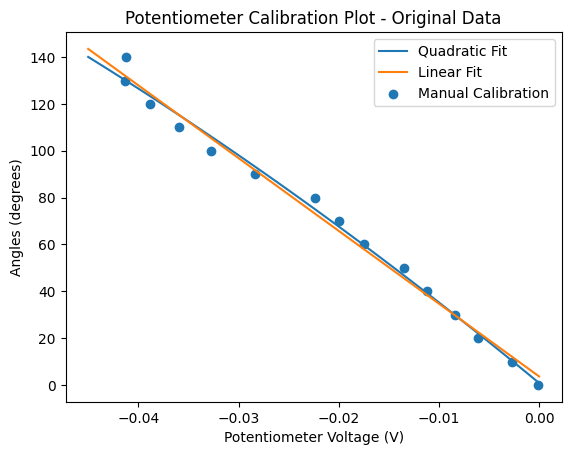

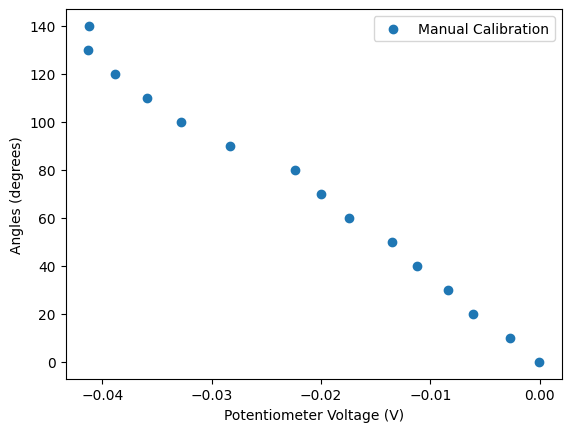

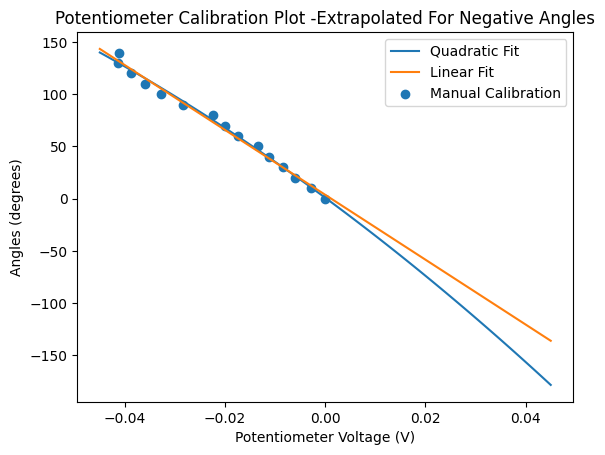

3
3


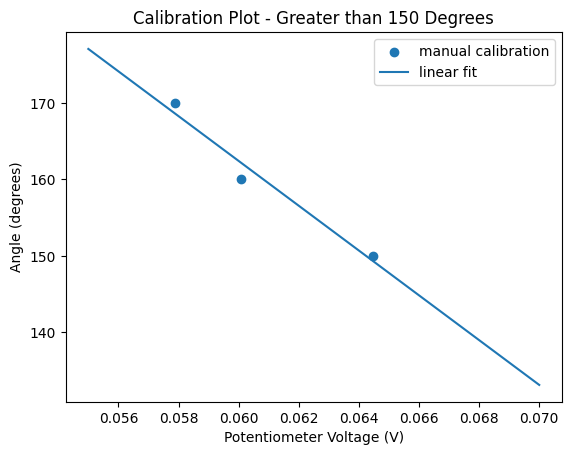

In [2]:
import pandas as pd
from statistics import mean,median,stdev
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define a function to which data will be fit.
def theta_solution(t,a,b,c,d):
    return a*np.exp(b*t)*np.cos(c*t-d)

def linear_fit(v,m,c):
    return m*v +c

def quadratic_fit(v,a,b,c):
    return a*v**2+b*v + c

# Define a function that can read a data file.
def getData(file):
    tab1 = pd.read_csv(file,
                    index_col=None,
                    header=None,
                    names=['Time','Voltage','AveVoltage'],
                    skiprows=12,
                    )
    return tab1

#calibration data
arr = np.array([])
data = getData("data/Deg0.csv")
v_data_offset = data["Voltage"][3000]
for i in range(0,150,10):
    file_name = "data/Deg"+str(i)+".csv"
    data = getData(file_name) 
    v_data = data["Voltage"]-v_data_offset
    avg = np.mean(v_data)
    arr = np.append(arr,avg)
degrees = np.arange(0,150,10)  
print(arr)
print(degrees)
linearfit = curve_fit(linear_fit,arr,degrees)
m = linearfit[0][0]
n = linearfit[0][1]
coef = [m,n]
voltage = np.linspace(-0.045,0,100)
linearfit_vals = linear_fit(voltage,m,n)
quad_fit = curve_fit(quadratic_fit,arr,degrees)
p = quad_fit[0][0]
q = quad_fit[0][1]
r = quad_fit[0][2]
quadraticfit_vals = quadratic_fit(voltage,p,q,r)


print(arr)
plt.plot(voltage,quadraticfit_vals, label="Quadratic Fit")
plt.plot(voltage,linearfit_vals, label="Linear Fit")
plt.scatter(arr, degrees, label = "Manual Calibration")
plt.xlabel("Potentiometer Voltage (V)")
plt.ylabel("Angles (degrees)")
plt.title("Potentiometer Calibration Plot - Original Data")
plt.legend()
plt.show()
# print(file_name)

plt.scatter(arr, degrees, label = "Manual Calibration")
plt.xlabel("Potentiometer Voltage (V)")
plt.ylabel("Angles (degrees)")
plt.legend()
plt.show()

voltage = np.linspace(-0.045,0.045,100)
linearfit_vals = linear_fit(voltage,m,n)
quadraticfit_vals = quadratic_fit(voltage,p,q,r)
plt.plot(voltage,quadraticfit_vals, label="Quadratic Fit")
plt.plot(voltage,linearfit_vals, label="Linear Fit")
plt.scatter(arr, degrees, label = "Manual Calibration")
plt.xlabel("Potentiometer Voltage (V)")
plt.ylabel("Angles (degrees)")
plt.title("Potentiometer Calibration Plot -Extrapolated For Negative Angles")
plt.legend()
plt.show()

###########################################################
#Angles greater than 150 degrees
arr2 = np.array([])
for i in range(150,180,10):
    file_name = "data/Deg"+str(i)+".csv"
    data = getData(file_name) 
    v_data = data["Voltage"]-v_data_offset
    avg = np.mean(v_data)
    arr2 = np.append(arr2,avg)
degrees2 = np.arange(150,180,10)  
#linear fit specific to greater than 150
l_150 = curve_fit(linear_fit, arr2, degrees2)
m_2 = l_150[0][0]
n_2 = l_150[0][1]
coef_150 = [m_2,n_2]
volt_150 = np.linspace(0.055,0.07)
print(len(arr2))
print(len(degrees2))
lin_150  = linear_fit(volt_150,coef_150[0],coef_150[1])
plt.scatter(arr2,degrees2, label='manual calibration')
plt.plot(volt_150,lin_150, label='linear fit')
plt.xlabel('Potentiometer Voltage (V)')
plt.ylabel('Angle (degrees)')
plt.title("Calibration Plot - Greater than 150 Degrees")
plt.legend()
plt.show()


## Case 1: Low Acute Angle

[5.46552639 5.46487978 5.4642334  ... 3.65288854 3.65287919 3.65286984]


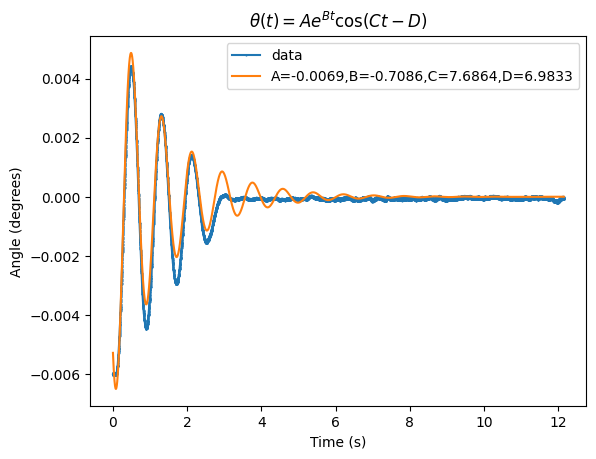

In [26]:
def angles_data_elementwise(v_data, coef_150, coef):
    mask = (-0.045 <= v_data) & (v_data <= 0.045)
    output = np.empty_like(v_data, dtype=float)
    output[mask] = linear_fit(v_data[mask], coef[0], coef[1])
    output[~mask] = linear_fit(v_data[~mask], coef_150[0], coef_150[1])
    
    return output

# Read one of the data files.
experiment_1 = getData("data/Dynamic/case1.csv")

# Remove data before and after
start = 350
finis = 12500

# Center data at zero vertically and horizontally
v_offset = experiment_1["AveVoltage"][finis]
t_offset = experiment_1["Time"][start]

# Create data vectors
t_data = np.array(experiment_1["Time"][start:finis]) - t_offset
v_data = np.array(experiment_1["AveVoltage"][start:finis]) - v_offset
angles_data = angles_data_elementwise(v_data, coef_150,coef)


curvefit = curve_fit(theta_solution,t_data,v_data)
a = curvefit[0][0]
b = curvefit[0][1]
c = curvefit[0][2]
d = curvefit[0][3]
theta_model_vals = theta_solution(t_data,a,b,c,d)

# angles_theta_vals = angles_data_elementwise(theta_model_vals,coef_150, coef)
print(angles_theta_vals)
labelstring = f"A={a:.4f},B={b:.4f},C={c:.4f},D={d:.4f}"
titlestring = r"$\theta(t) = A e^{Bt} \cos(Ct -D)$"


plt.plot(t_data,v_data,marker='.',markersize=1,label='data')
plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.plot(t_data,theta_model_vals,label=labelstring)
plt.title(titlestring)
plt.legend()
# plt.savefig("curvefit.png")
plt.show()

## Case 2: Medium Acute Angle

[5.46552639 5.46487978 5.4642334  ... 3.65288854 3.65287919 3.65286984]


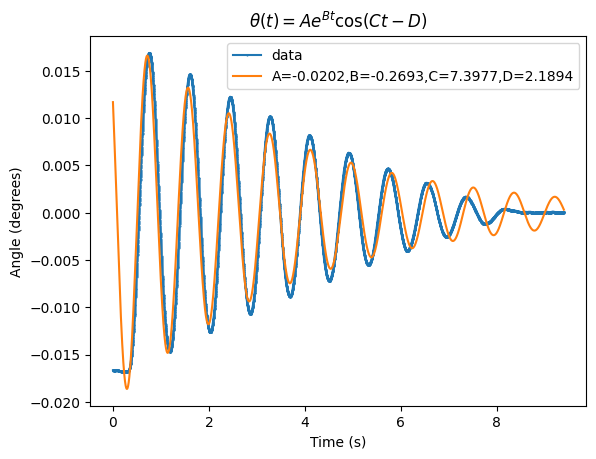

In [34]:
# Read one of the data files.
experiment_1 = getData("data/Dynamic/case2.csv")

# Remove data before and after
start = 600
finis = 10000

# Center data at zero vertically and horizontally
v_offset = experiment_1["AveVoltage"][finis]
t_offset = experiment_1["Time"][start]

# Create data vectors
t_data = np.array(experiment_1["Time"][start:finis]) - t_offset
v_data = np.array(experiment_1["AveVoltage"][start:finis]) - v_offset
angles_data = angles_data_elementwise(v_data, coef_150,coef)


curvefit = curve_fit(theta_solution,t_data,v_data)
a = curvefit[0][0]
b = curvefit[0][1]
c = curvefit[0][2]
d = curvefit[0][3]
theta_model_vals = theta_solution(t_data,a,b,c,d)

# angles_theta_vals = angles_data_elementwise(theta_model_vals,coef_150, coef)
print(angles_theta_vals)
labelstring = f"A={a:.4f},B={b:.4f},C={c:.4f},D={d:.4f}"
titlestring = r"$\theta(t) = A e^{Bt} \cos(Ct -D)$"


plt.plot(t_data,v_data,marker='.',markersize=1,label='data')
plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.plot(t_data,theta_model_vals,label=labelstring)
plt.title(titlestring)
plt.legend()
# plt.savefig("curvefit.png")
plt.show()

## Case 3: High Acute Angle

[5.46552639 5.46487978 5.4642334  ... 3.65288854 3.65287919 3.65286984]


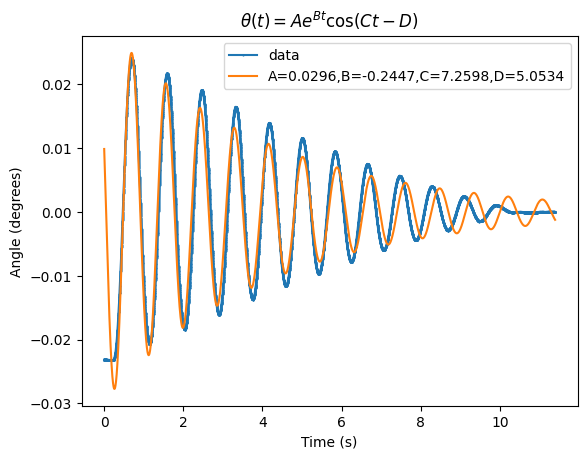

In [36]:
# Read one of the data files.
experiment_1 = getData("data/Dynamic/case3.csv")

# Remove data before and after
start = 600
finis = 12000

# Center data at zero vertically and horizontally
v_offset = experiment_1["AveVoltage"][finis]
t_offset = experiment_1["Time"][start]

# Create data vectors
t_data = np.array(experiment_1["Time"][start:finis]) - t_offset
v_data = np.array(experiment_1["AveVoltage"][start:finis]) - v_offset
angles_data = angles_data_elementwise(v_data, coef_150,coef)


curvefit = curve_fit(theta_solution,t_data,v_data)
a = curvefit[0][0]
b = curvefit[0][1]
c = curvefit[0][2]
d = curvefit[0][3]
theta_model_vals = theta_solution(t_data,a,b,c,d)

# angles_theta_vals = angles_data_elementwise(theta_model_vals,coef_150, coef)
print(angles_theta_vals)
labelstring = f"A={a:.4f},B={b:.4f},C={c:.4f},D={d:.4f}"
titlestring = r"$\theta(t) = A e^{Bt} \cos(Ct -D)$"


plt.plot(t_data,v_data,marker='.',markersize=1,label='data')
plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.plot(t_data,theta_model_vals,label=labelstring)
plt.title(titlestring)
plt.legend()
# plt.savefig("curvefit.png")
plt.show()

## Case 4: Obtuse Angle

[5.46552639 5.46487978 5.4642334  ... 3.65288854 3.65287919 3.65286984]


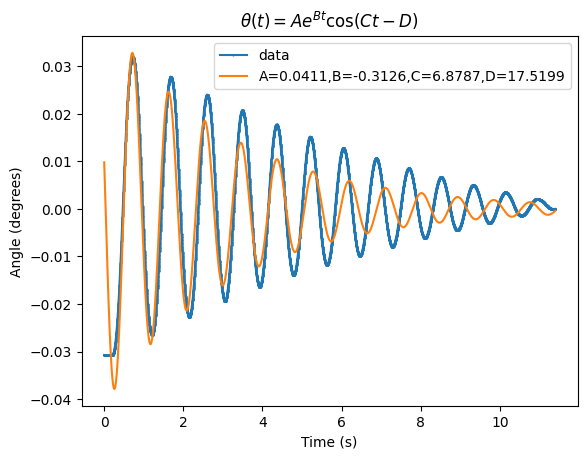

In [37]:
# Read one of the data files.
experiment_1 = getData("data/Dynamic/case4.csv")

# Remove data before and after
start = 600
finis = 12000

# Center data at zero vertically and horizontally
v_offset = experiment_1["AveVoltage"][finis]
t_offset = experiment_1["Time"][start]

# Create data vectors
t_data = np.array(experiment_1["Time"][start:finis]) - t_offset
v_data = np.array(experiment_1["AveVoltage"][start:finis]) - v_offset
angles_data = angles_data_elementwise(v_data, coef_150,coef)


curvefit = curve_fit(theta_solution,t_data,v_data)
a = curvefit[0][0]
b = curvefit[0][1]
c = curvefit[0][2]
d = curvefit[0][3]
theta_model_vals = theta_solution(t_data,a,b,c,d)

# angles_theta_vals = angles_data_elementwise(theta_model_vals,coef_150, coef)
print(angles_theta_vals)
labelstring = f"A={a:.4f},B={b:.4f},C={c:.4f},D={d:.4f}"
titlestring = r"$\theta(t) = A e^{Bt} \cos(Ct -D)$"


plt.plot(t_data,v_data,marker='.',markersize=1,label='data')
plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.plot(t_data,theta_model_vals,label=labelstring)
plt.title(titlestring)
plt.legend()
# plt.savefig("curvefit.png")
plt.show()

## Case 5: High Obtuse Angle

[5.46552639 5.46487978 5.4642334  ... 3.65288854 3.65287919 3.65286984]


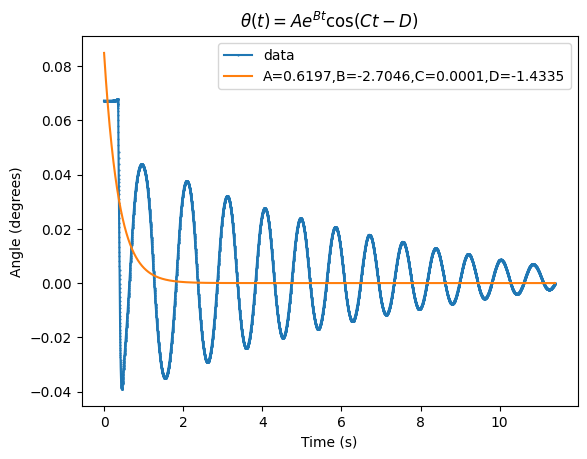

In [38]:
# Read one of the data files.
experiment_1 = getData("data/Dynamic/case5.csv")

# Remove data before and after
start = 600
finis = 12000

# Center data at zero vertically and horizontally
v_offset = experiment_1["AveVoltage"][finis]
t_offset = experiment_1["Time"][start]

# Create data vectors
t_data = np.array(experiment_1["Time"][start:finis]) - t_offset
v_data = np.array(experiment_1["AveVoltage"][start:finis]) - v_offset
angles_data = angles_data_elementwise(v_data, coef_150,coef)


curvefit = curve_fit(theta_solution,t_data,v_data)
a = curvefit[0][0]
b = curvefit[0][1]
c = curvefit[0][2]
d = curvefit[0][3]
theta_model_vals = theta_solution(t_data,a,b,c,d)

# angles_theta_vals = angles_data_elementwise(theta_model_vals,coef_150, coef)
print(angles_theta_vals)
labelstring = f"A={a:.4f},B={b:.4f},C={c:.4f},D={d:.4f}"
titlestring = r"$\theta(t) = A e^{Bt} \cos(Ct -D)$"


plt.plot(t_data,v_data,marker='.',markersize=1,label='data')
plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.plot(t_data,theta_model_vals,label=labelstring)
plt.title(titlestring)
plt.legend()
# plt.savefig("curvefit.png")
plt.show()

## Case 6: Nearly Vertical

[5.46552639 5.46487978 5.4642334  ... 3.65288854 3.65287919 3.65286984]


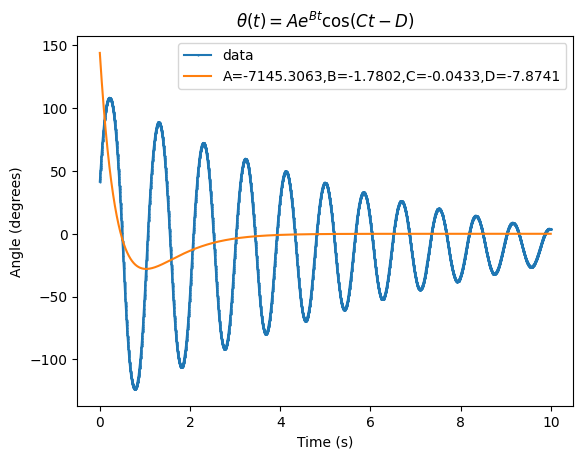

In [42]:
# Read one of the data files.
experiment_1 = getData("data/Dynamic/case6.csv")

# Remove data before and after
start = 2000
finis = 12000

# Center data at zero vertically and horizontally
v_offset = experiment_1["AveVoltage"][finis]
t_offset = experiment_1["Time"][start]

# Create data vectors
t_data = np.array(experiment_1["Time"][start:finis]) - t_offset
v_data = np.array(experiment_1["AveVoltage"][start:finis]) - v_offset
angles_data = angles_data_elementwise(v_data, coef_150,coef)


curvefit = curve_fit(theta_solution,t_data,angles_data)
a = curvefit[0][0]
b = curvefit[0][1]
c = curvefit[0][2]
d = curvefit[0][3]
theta_model_vals = theta_solution(t_data,a,b,c,d)

# angles_theta_vals = angles_data_elementwise(theta_model_vals,coef_150, coef)
print(angles_theta_vals)
labelstring = f"A={a:.4f},B={b:.4f},C={c:.4f},D={d:.4f}"
titlestring = r"$\theta(t) = A e^{Bt} \cos(Ct -D)$"


plt.plot(t_data,angles_data,marker='.',markersize=1,label='data')
plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.plot(t_data,theta_model_vals,label=labelstring)
plt.title(titlestring)
plt.legend()
# plt.savefig("curvefit.png")
plt.show()